# Book Genre Classification

In [1]:
# computation, data manipulation and visualization
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Preprocessing 
import re 
import nltk
from collections import Counter 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split 

# Machine Leearning Libriaries for model building
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB, MultinomialNB 
from sklearn.svm import SVC 
from sklearn import metrics 

In [2]:
# import data set
books = pd.read_csv("BooksDataSet.csv")
books.head()

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [3]:
# drop the `Unnamed: 0` column
books = books.drop(columns=["Unnamed: 0"])
books.head(3)

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...


In [4]:
# Get more info about the data frame
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book_id    3000 non-null   int64 
 1   book_name  3000 non-null   object
 2   genre      3000 non-null   object
 3   summary    3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


There are no null values in our data set.

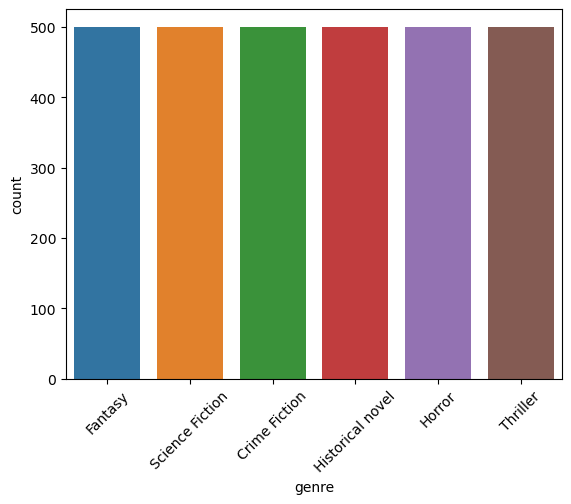

In [5]:
# lets ge a count plot of our target column
sns.countplot(data=books, x="genre")
plt.xticks(rotation = 45);

Our target column (multi-class classification) are equally distributed. We have a balanced class.

In [6]:
# View the summay of one book
# books["summary"].iloc[1]
books["summary"][1]

' As the book opens, Jason awakens on a school bus, unable to remember who or where he is, or anything about his past. He is sitting next to Piper McLean and Leo Valdez, who call him by name and say they are his girlfriend and best friend respectively. All three are part of a class field trip to the Grand Canyon, and after they arrive, a classmate Dylan turns into a Venti (Storm Spirit) and attacks the trio and their trip leader, Coach Gleeson Hedge. In the ensuing fight, Jason surprises everyone, including himself, when one of his coins turns into a sword which he uses to battle the storm spirits. Coach Hedge, who reveals himself to be a satyr during the fight, is taken captive by a fleeing spirit. After the battle, a flying chariot arrives to rescue the trio, but one of the people in it, Annabeth, is upset when she discovers that her missing boyfriend, Percy Jackson, is not there as she expected. Annabeth, seeking Percy, was told in a vision from the goddess Hera to look there for th

We can see that there are a lot of characters and punctuations in the summary. We will need to clean the text. Therefore, we will write a function to clean the text.

In [7]:
text = "eolus\'s castle, Jason, Leo and Piper become separated from Thalia, who promises to meet them at the Wolf House, the last place Thalia had seen Jason before this meeting. After being nearly apprehended by Aeolus, who is under Gaea\'s orders, the trio manage to escape thanks to Mellie, Aeolus`s former assi"
text

"eolus's castle, Jason, Leo and Piper become separated from Thalia, who promises to meet them at the Wolf House, the last place Thalia had seen Jason before this meeting. After being nearly apprehended by Aeolus, who is under Gaea's orders, the trio manage to escape thanks to Mellie, Aeolus`s former assi"

In [8]:
text = re.sub("[^a-zA-Z]", " ", text)
text

'eolus s castle  Jason  Leo and Piper become separated from Thalia  who promises to meet them at the Wolf House  the last place Thalia had seen Jason before this meeting  After being nearly apprehended by Aeolus  who is under Gaea s orders  the trio manage to escape thanks to Mellie  Aeolus s former assi'

In [9]:
text = " ".join(text.split())
text

'eolus s castle Jason Leo and Piper become separated from Thalia who promises to meet them at the Wolf House the last place Thalia had seen Jason before this meeting After being nearly apprehended by Aeolus who is under Gaea s orders the trio manage to escape thanks to Mellie Aeolus s former assi'

In [10]:
text = text.lower()
text

'eolus s castle jason leo and piper become separated from thalia who promises to meet them at the wolf house the last place thalia had seen jason before this meeting after being nearly apprehended by aeolus who is under gaea s orders the trio manage to escape thanks to mellie aeolus s former assi'

In [18]:
# Write a function to clean the text
def clean_text(text):
    
    # remove the "\" sign
    text = re.sub("'\''","",text)
    
    # remove special symbols
    text = re.sub("[^a-zA-Z]", " ", text)
    
    # Remove white spaces
    text = " ".join(text.split())
    
    # Conevrt text to lowercase
    text = text.lower()
    
    return text
    
# books["summary"] = books["summary"].apply(clean_text)

In [19]:
books['summary'].apply(clean_text)

0       drowned wednesday is the first trustee among t...
1       as the book opens jason awakens on a school bu...
2       cugel is easily persuaded by the merchant fian...
3       the book opens with herald mage vanyel returni...
4       taran and gurgi have returned to caer dallben ...
                              ...                        
2995    a novel from the numa files a kurt austin adve...
2996    gilbert kemp is dealer specializing in antique...
2997    how do you know when you re in too deep davey ...
2998    the story concerns the life of johnnie pascoe ...
2999    the first chief will henry lee the novel opens...
Name: summary, Length: 3000, dtype: object

In [22]:
books['summary'] = books['summary'].apply(lambda x:clean_text(x))
books['summary'].iloc[1]

'as the book opens jason awakens on a school bus unable to remember who or where he is or anything about his past he is sitting next to piper mclean and leo valdez who call him by name and say they are his girlfriend and best friend respectively all three are part of a class field trip to the grand canyon and after they arrive a classmate dylan turns into a venti storm spirit and attacks the trio and their trip leader coach gleeson hedge in the ensuing fight jason surprises everyone including himself when one of his coins turns into a sword which he uses to battle the storm spirits coach hedge who reveals himself to be a satyr during the fight is taken captive by a fleeing spirit after the battle a flying chariot arrives to rescue the trio but one of the people in it annabeth is upset when she discovers that her missing boyfriend percy jackson is not there as she expected annabeth seeking percy was told in a vision from the goddess hera to look there for the guy with one shoe but this 

### Plotting the most frequent words